<a href="https://colab.research.google.com/github/iamutkarshgoyal/Wall-Mart_Case_Study/blob/main/Wall_Mart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import norm, binom

import random

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df = pd.read_csv("/content/drive/MyDrive/Data_Sets Analysis/Walmart Data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [107]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [108]:
df.shape

(550068, 10)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [110]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [112]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [113]:
df.describe(include = object)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [114]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [115]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [116]:
# Defining a program to provide count of the values for a variable with sorted index
def value_count(x):
  return x.value_counts().sort_index()

In [117]:
x = df.Product_Category
value_count(x)

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

There are 20 different Product Categories in the data.

In [118]:
x = df.Gender
value_count(x)

F    135809
M    414259
Name: Gender, dtype: int64

In [119]:
x = df.Age
value_count(x)

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [120]:
x = df.Occupation
value_count(x)

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [121]:
x = df.City_Category
value_count(x)

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [122]:
x = df.Stay_In_Current_City_Years
value_count(x)

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [123]:
x = df.Marital_Status
value_count(x)

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [124]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [125]:
# Defining a function for marginal probability for different columns
def marginal_test(indx,clmn):
  return pd.crosstab(index = indx, columns = clmn, margins = True, margins_name = 'Total', normalize = True).round(2)

In [126]:
indx = df.Gender
clmn = df.Age
marginal_test(indx,clmn)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,Total
Gender,,,,,,,,
F,0.01,0.04,0.09,0.05,0.02,0.02,0.01,0.25
M,0.02,0.14,0.31,0.15,0.06,0.05,0.03,0.75
Total,0.03,0.18,0.40,0.20,0.08,0.07,0.04,1.00


In [127]:
indx = df.Product_Category
clmn = df.Marital_Status
marginal_test(indx,clmn)

Marital_Status,0,1,Total
Product_Category,,,
1,0.15,0.10,0.26
2,0.03,0.02,0.04
3,0.02,0.01,0.04
4,0.01,0.01,0.02
5,0.16,0.11,0.27
6,0.02,0.02,0.04
7,0.00,0.00,0.01
8,0.12,0.09,0.21
9,0.00,0.00,0.00


In [128]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [129]:
indx = df.Product_Category
clmn = df.Gender
marginal_test(indx,clmn)

Gender,F,M,Total
Product_Category,,,
1,0.05,0.21,0.26
2,0.01,0.03,0.04
3,0.01,0.03,0.04
4,0.01,0.01,0.02
5,0.08,0.20,0.27
6,0.01,0.03,0.04
7,0.00,0.01,0.01
8,0.06,0.15,0.21
9,0.00,0.00,0.00


In [130]:
indx = df.Occupation
clmn = df.City_Category
marginal_test(indx,clmn)

City_Category,A,B,C,Total
Occupation,,,,
0,0.03,0.05,0.04,0.13
1,0.02,0.04,0.03,0.09
2,0.02,0.02,0.01,0.05
3,0.01,0.01,0.01,0.03
4,0.04,0.05,0.03,0.13
5,0.00,0.01,0.01,0.02
6,0.01,0.02,0.01,0.04
7,0.03,0.04,0.04,0.11
8,0.00,0.00,0.00,0.00


In [131]:
indx = df.Occupation
clmn = df.Stay_In_Current_City_Years
marginal_test(indx,clmn)

Stay_In_Current_City_Years,0,1,2,3,4+,Total
Occupation,,,,,,
0,0.02,0.04,0.02,0.02,0.02,0.13
1,0.01,0.03,0.02,0.02,0.01,0.09
2,0.01,0.02,0.01,0.01,0.00,0.05
3,0.00,0.01,0.01,0.01,0.00,0.03
4,0.02,0.04,0.03,0.02,0.02,0.13
5,0.00,0.01,0.00,0.00,0.00,0.02
6,0.00,0.02,0.00,0.01,0.01,0.04
7,0.01,0.04,0.02,0.02,0.02,0.11
8,0.00,0.00,0.00,0.00,0.00,0.00


In [132]:
indx = df.Product_Category
clmn = df.Age
marginal_test(indx,clmn)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,Total
Product_Category,,,,,,,,
1,0.01,0.05,0.11,0.05,0.02,0.02,0.01,0.26
2,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.04
3,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.04
4,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02
5,0.01,0.05,0.11,0.05,0.02,0.02,0.01,0.27
6,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.04
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
8,0.00,0.03,0.08,0.04,0.02,0.02,0.01,0.21
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [133]:
Total_Revenue = df.Purchase.sum()
Total_Revenue

5095812742

~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)


75% of the users are Male and 25% are Female


60% Single, 40% Married


35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years


Total of 20 product categories are there


There are 20 differnent types of occupations in the city

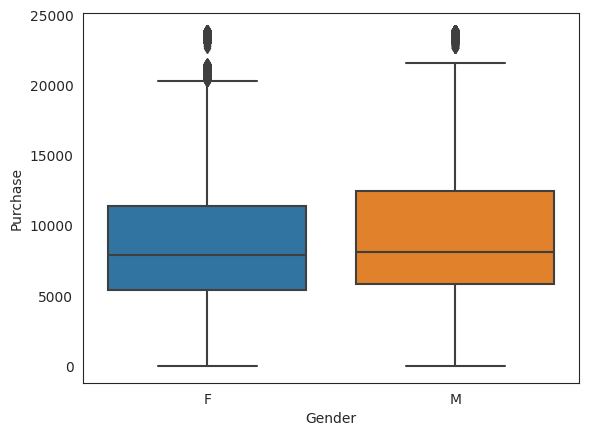

In [134]:
sns.boxplot(data = df, x = "Gender", y = "Purchase")
plt.show()

There are outliers in purchase variable.

Male customers spend more money than female customers

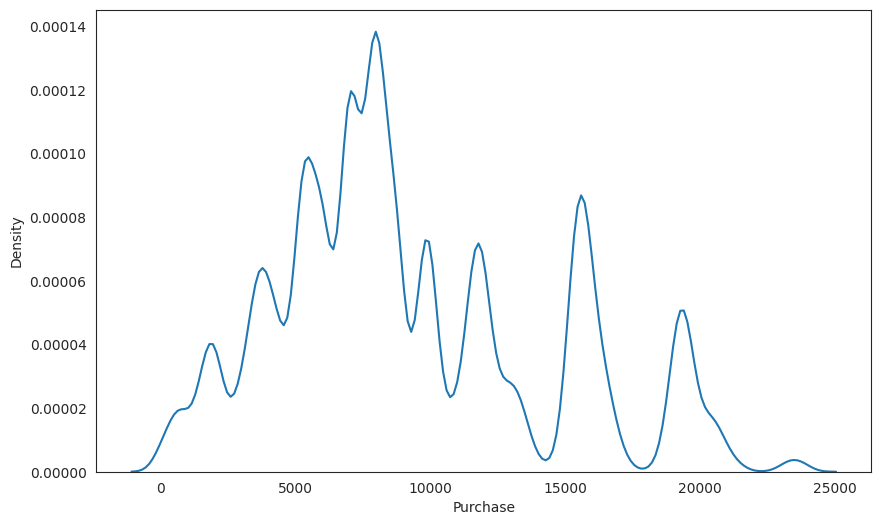

In [135]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data = df, x = "Purchase")
plt.show()

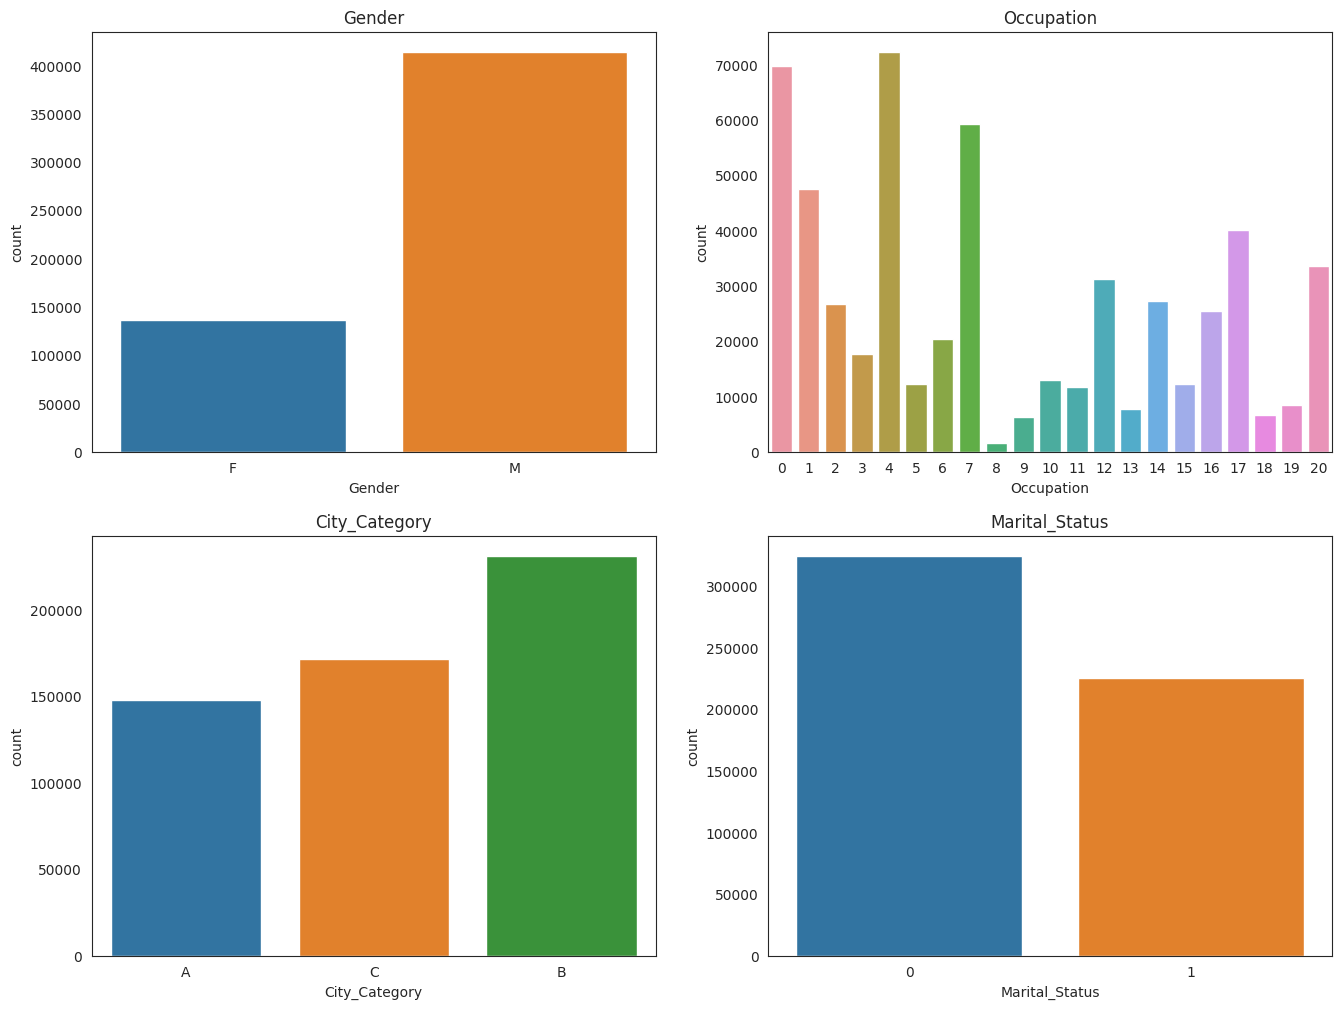

In [136]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
axs[0,0].set_title("Gender")
axs[0,1].set_title("Occupation")
axs[1,0].set_title("City_Category")
axs[1,1].set_title("Marital_Status")

plt.show()

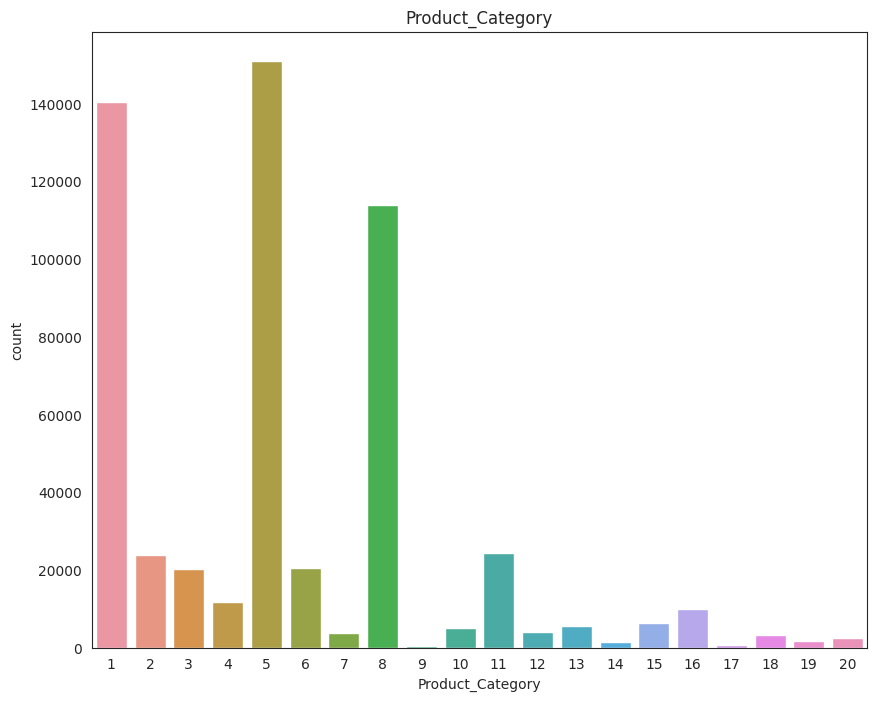

In [137]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.title("Product_Category")
plt.show()

Most of the users are Male

There are 20 different types of Occupation and Product_Category

More users belong to B City_Category

More users are Single as compare to Married

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

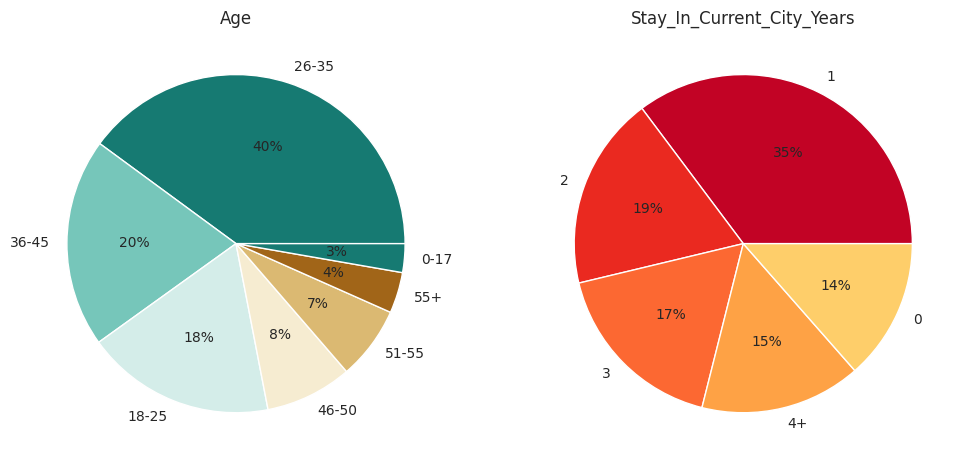

In [138]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

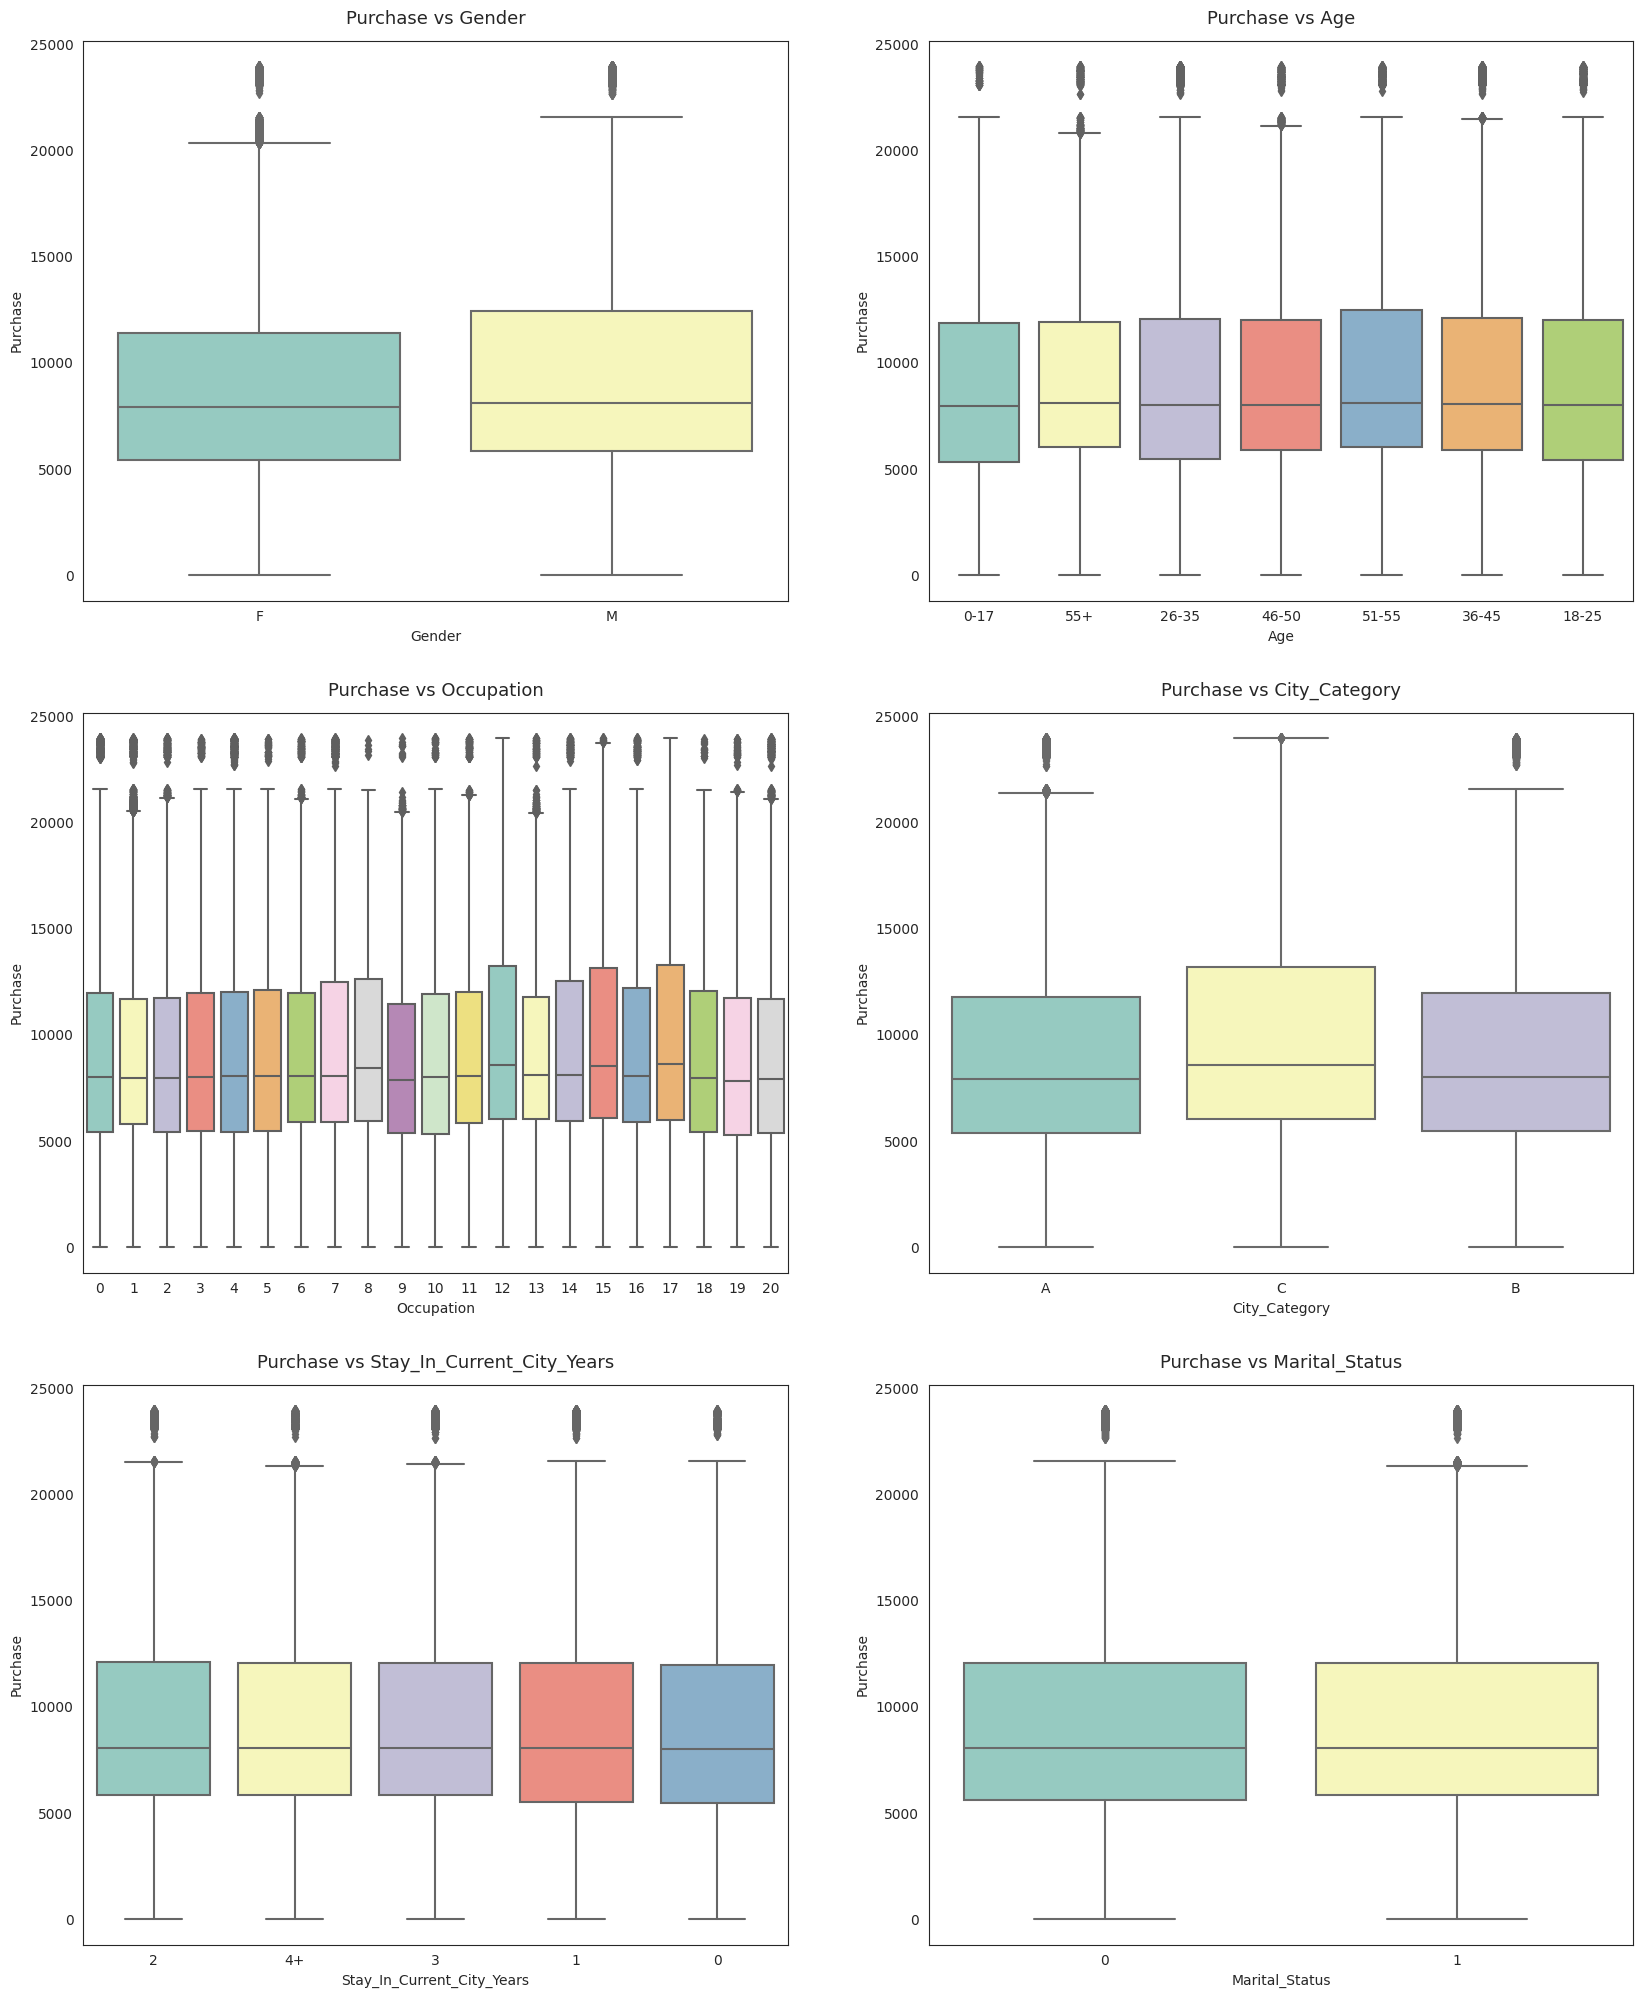

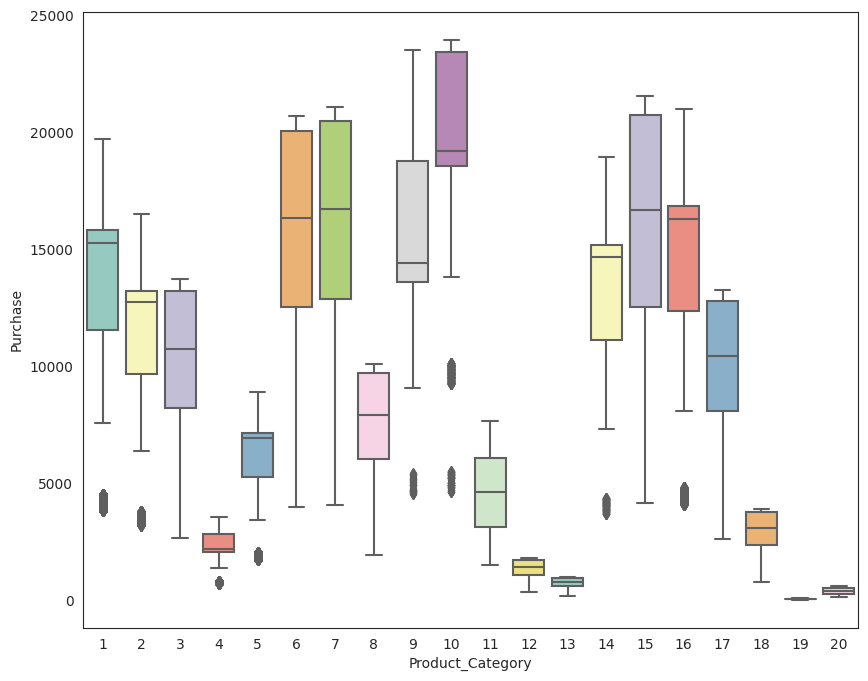

In [139]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

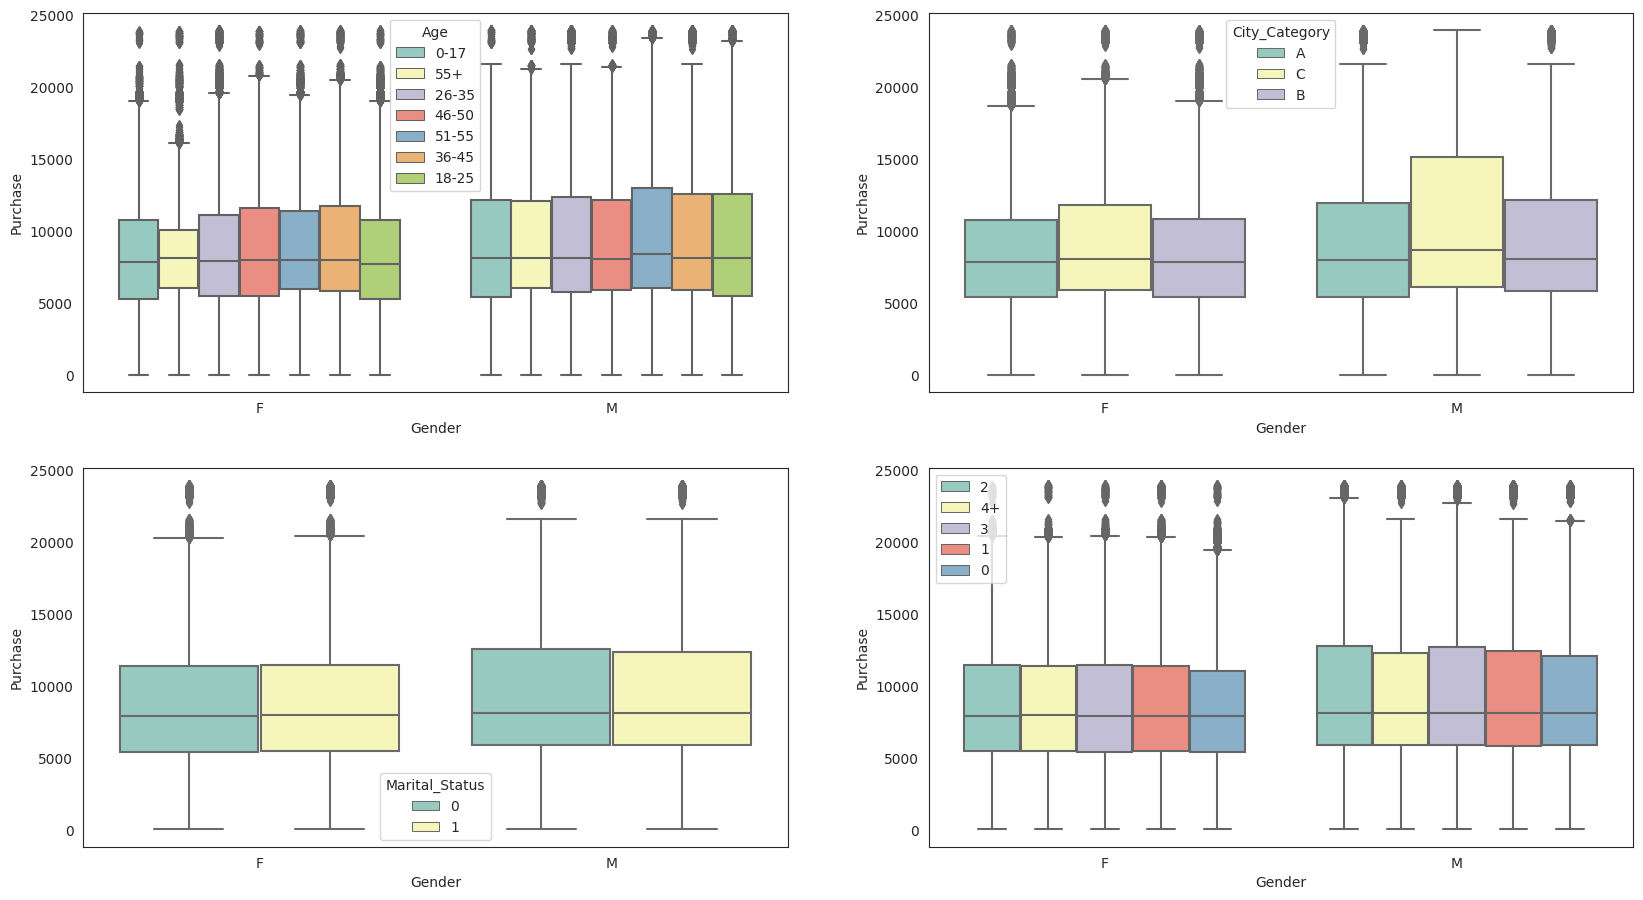

In [140]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [141]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [142]:
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

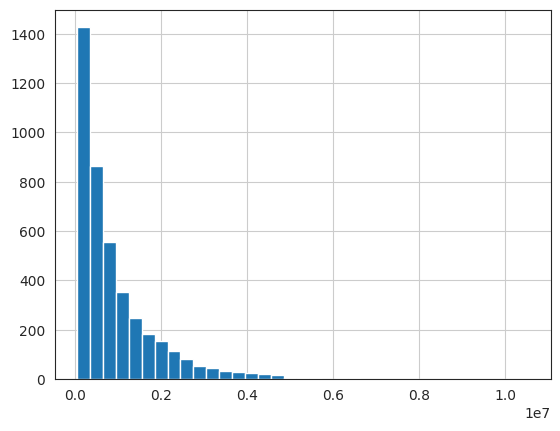

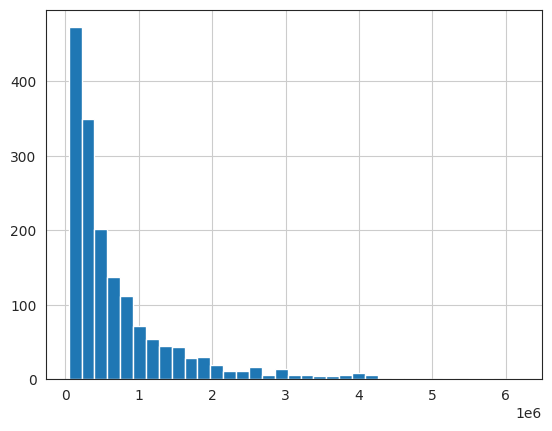

In [143]:
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [144]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [145]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [146]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

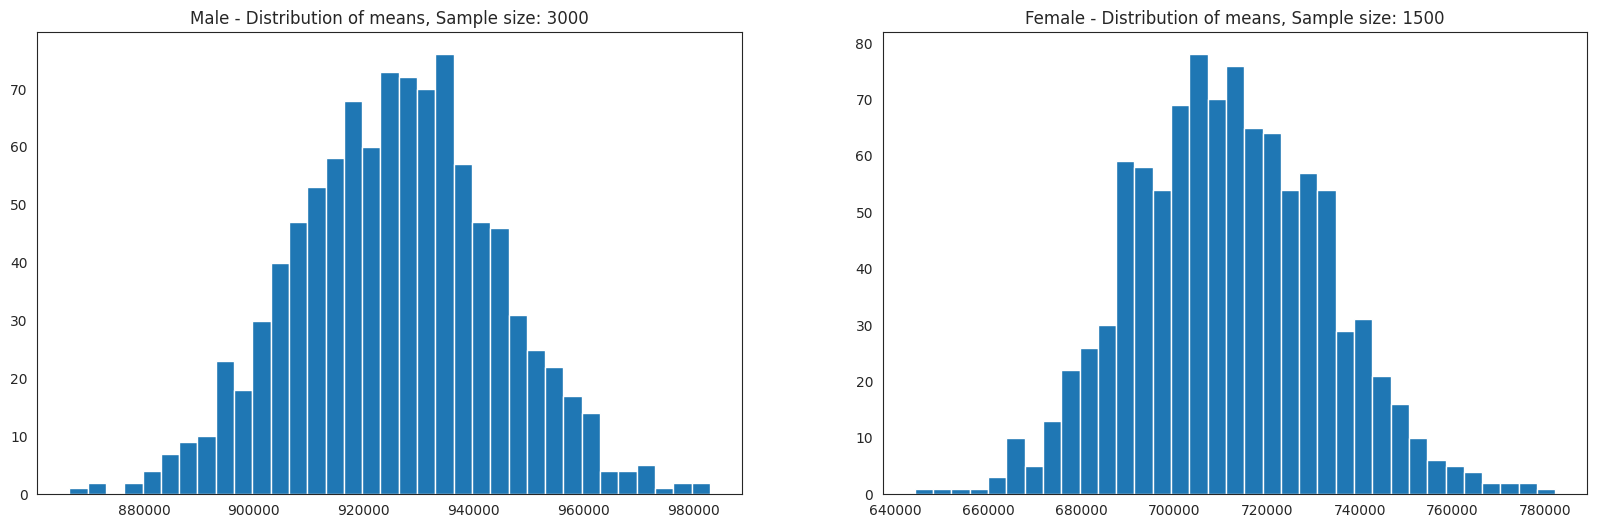

In [147]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [148]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925831.96
Population mean - Mean of sample means of amount spend for Female: 711672.88

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [149]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


In [150]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [151]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [152]:
amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

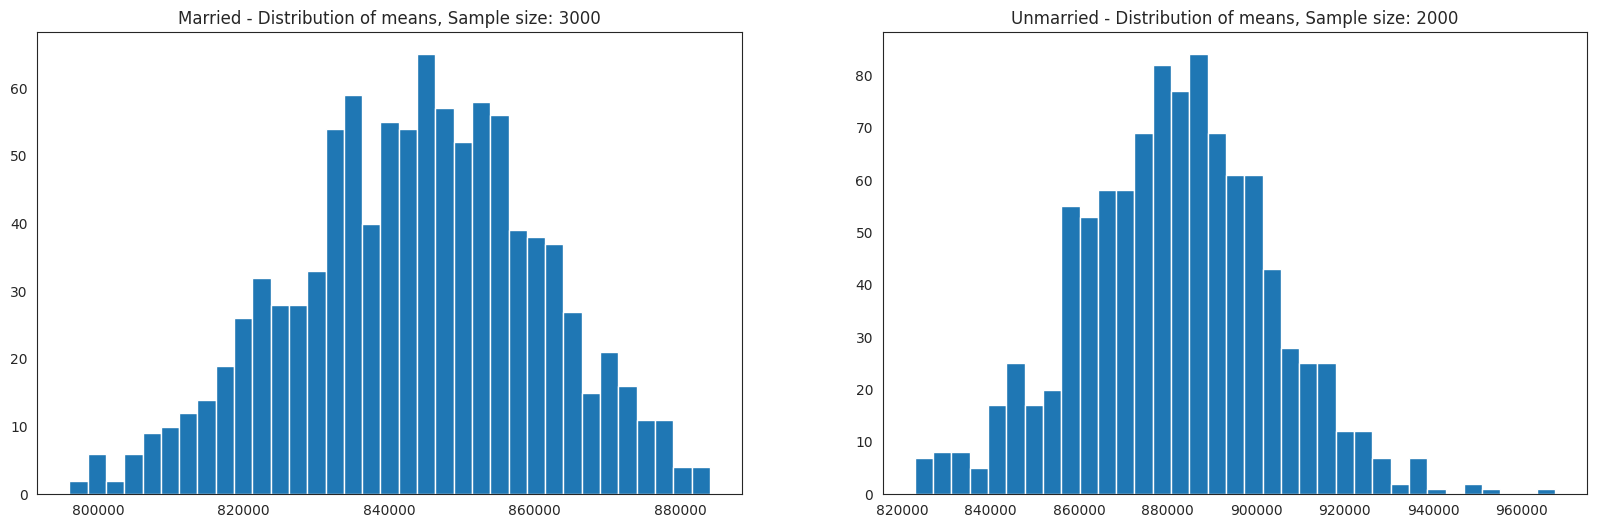

Population mean - Mean of sample means of amount spend for Married: 843428.36
Population mean - Mean of sample means of amount spend for Unmarried: 881475.44

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [153]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [154]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


In [155]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [156]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [157]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [158]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


In [159]:
# Female Purchase Outliers
Female_Purchase_Outliers = df[df["Purchase"] > 20500][df["Gender"] == "F"]
Male_Purchase_Outliers = df[df["Purchase"] > 21000][df["Gender"] == "M"]

<ipython-input-159-e378c3b4b81b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Female_Purchase_Outliers = df[df["Purchase"] > 20500][df["Gender"] == "F"]
<ipython-input-159-e378c3b4b81b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Male_Purchase_Outliers = df[df["Purchase"] > 21000][df["Gender"] == "M"]


In [160]:
Female_Purchase_Outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
731,1000139,P00020142,F,26-35,20,C,2,0,7,21002
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
1106,1000187,P00247642,F,46-50,1,B,1,0,7,20771
...,...,...,...,...,...,...,...,...,...,...
545461,1005972,P00255842,F,26-35,20,B,0,0,16,20634
545618,1005997,P00121042,F,26-35,7,A,3,0,15,20743
545834,1006029,P00327342,F,26-35,1,C,1,1,16,20616
545856,1006036,P00279742,F,26-35,15,B,4+,1,16,20766


In [161]:
Male_Purchase_Outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
1179,1000195,P00183142,M,26-35,12,B,4+,1,15,21224
1445,1000235,P00116142,M,26-35,0,B,0,0,10,23826
1902,1000304,P00273342,M,26-35,0,B,1,0,10,23139
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
545101,1005915,P00174242,M,18-25,4,C,0,0,15,21101
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663
545664,1006002,P00071442,M,51-55,0,C,1,1,15,21310


In [162]:
Female_Purchase_Outliers[["Product_Category", "Purchase"]].groupby(by = "Product_Category").sum("Purchase")

,Purchase
Product_Category,
6,6838717
7,4639574
9,323526
10,12314362
15,5960794
16,5763391


In [163]:
Male_Purchase_Outliers[["Product_Category", "Purchase"]].groupby(by = "Product_Category").sum("Purchase")

,Purchase
Product_Category,
7,1977858
9,1406269
10,41137739
15,18798712


In [164]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [165]:
df[["Gender","Purchase"]].groupby(by = ["Gender"]).mean("Purchase").round(2)

,Purchase
Gender,
F,8734.57
M,9437.53


As per above output males are more potential buyer then the females.

In [166]:
indx = df.Product_Category
clmn = df.Gender
marginal_test(indx,clmn)

Gender,F,M,Total
Product_Category,,,
1,0.05,0.21,0.26
2,0.01,0.03,0.04
3,0.01,0.03,0.04
4,0.01,0.01,0.02
5,0.08,0.20,0.27
6,0.01,0.03,0.04
7,0.00,0.01,0.01
8,0.06,0.15,0.21
9,0.00,0.00,0.00


In [167]:
print("Male Standard Deviation: ",df[df["Gender"] == "M"]["Purchase"].std().round(2))
print("Female Standard Deviation: ",df[df["Gender"] == "F"]["Purchase"].std().round(2))

Male Standard Deviation:  5092.19
Female Standard Deviation:  4767.23


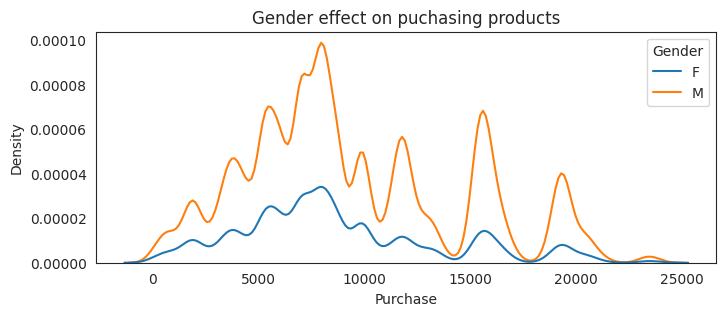

In [168]:
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Purchase", hue = "Gender")
plt.title("Gender effect on puchasing products")
plt.show()

In [169]:
sample_purchase_male = random.sample(sorted(df[df["Gender"] == "M"]["Purchase"]), k = 200)
sample_purchase_female = random.sample(sorted(df[df["Gender"] == "F"]["Purchase"]), k = 200)

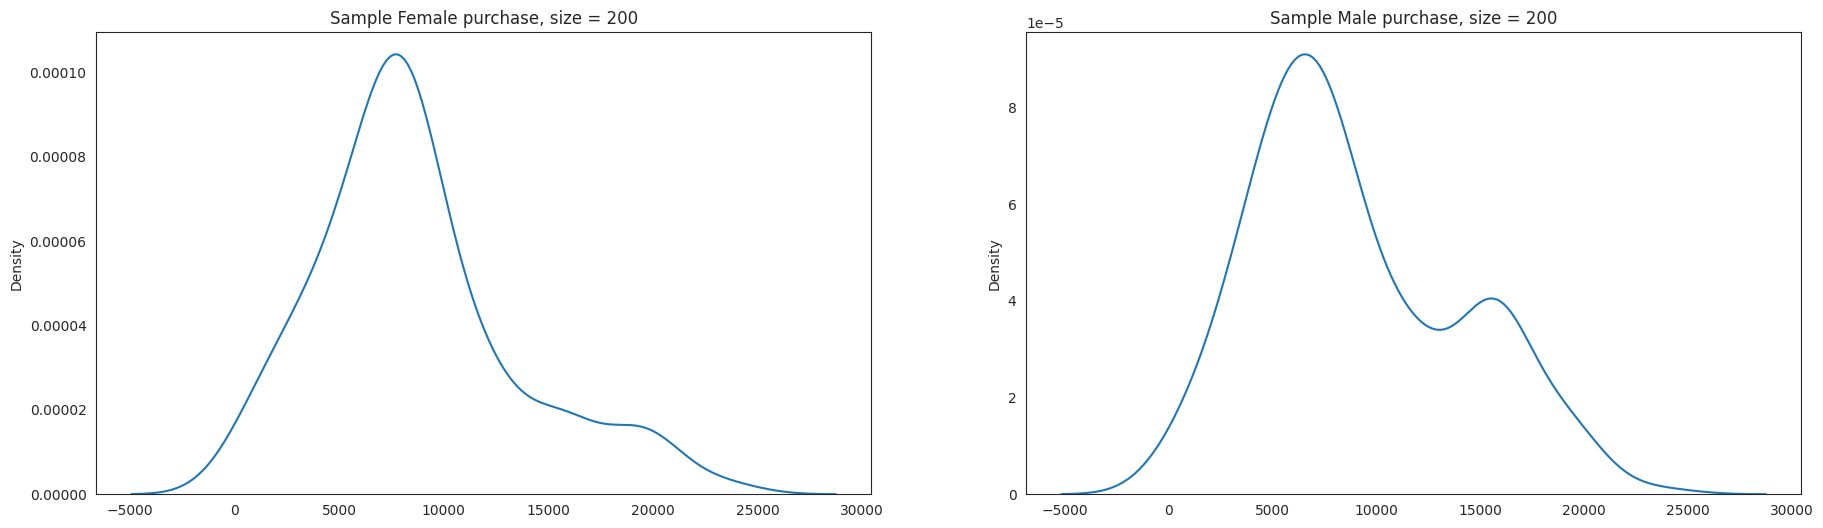

In [170]:
plt.figure(figsize=(22,6))

plt.subplot(121)
sns.kdeplot(x = sample_purchase_female)
plt.title("Sample Female purchase, size = 200")

plt.subplot(1,2,2)
sns.kdeplot(x = sample_purchase_male)
plt.title("Sample Male purchase, size = 200")

plt.show()

In [171]:
print("Sample purchase of Female Mean: ",np.mean(sample_purchase_female))
print("Original Female Mean: ", df[df["Gender"] == "F"]["Purchase"].mean().round(3))
print()
print("Sample purchase of Male Mean: ",np.mean(sample_purchase_male))
print("Sample purchase of Male Mean: ",df[df["Gender"] == "M"]["Purchase"].mean().round(3))

Sample purchase of Female Mean:  8648.305
Original Female Mean:  8734.566

Sample purchase of Male Mean:  9030.175
Sample purchase of Male Mean:  9437.526


There is no huge difference between sample and original mean of Female and male, and distribution is also gaussian or normal distribution.

Data is symmetrically distributed with no skew. When plotted on a graph, the data follows a bell shape, with most values clustering around a central region and tapering off as they go further away from the center.

In [172]:
alpha95 = 0.05
alpha90 = 0.01
alpha99 = 0.10

sample_mean_female = np.mean(sample_purchase_female)
sample_mean_male = np.mean(sample_purchase_male)

original_mean_female = df[df["Gender"] == "F"]["Purchase"].mean()
original_mean_male = df[df["Gender"] == "M"]["Purchase"].mean()

sample_size = 200

standard_error_male = df[df["Gender"] == "M"]["Purchase"].std() / np.sqrt(sample_size)
standard_error_female = df[df["Gender"] == "F"]["Purchase"].std() / np.sqrt(sample_size)

z_value_male = (original_mean_male - sample_mean_male) / np.sqrt(standard_error_male)
z_value_female = (original_mean_female - sample_mean_female) / np.sqrt(standard_error_female)

In [173]:
# Calculate the test statistic (z-score)
# Ho: There is no significant difference between the mean score between the male and female purchase.
# Ha: There is a significant difference in the mean scores between the male and female purchase.

z_score = ((sample_mean_female -
            sample_mean_male) -0) / np.sqrt((standard_error_female ** 2 / sample_size) +
             (standard_error_female **2 / sample_size))

print('Z-Score:', np.abs(z_score))

Z-Score: 11.328284149141735


In [174]:
# Calculate the critical value
z_critical = norm.ppf(1 - alpha95/2)
print('Critical Z-Score:',z_critical)

Critical Z-Score: 1.959963984540054


In [175]:
# P-Value : Probability of getting less than a Z-score
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
print('P-Value :',p_value)

P-Value : 0.0


In [176]:
# Compare the p-value with the significance level
if p_value < alpha95:
    print("""Reject the null hypothesis.
There is a significant difference between the male and female purchase.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between the male and female purchase.""")

Reject the null hypothesis.
There is a significant difference between the male and female purchase.


In [177]:
# Compare the p-value with the significance level
if p_value < alpha90:
    print("""Reject the null hypothesis.
There is a significant difference between the male and female purchase.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between the male and female purchase.""")

Reject the null hypothesis.
There is a significant difference between the male and female purchase.


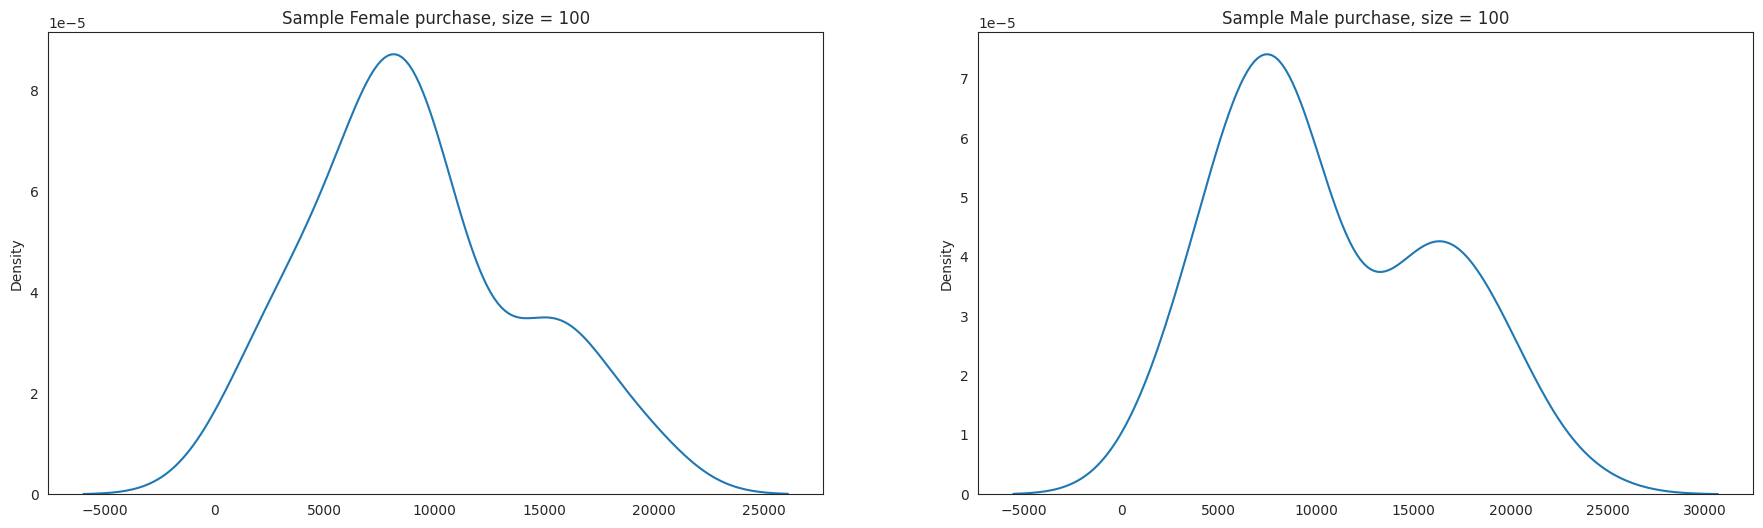

In [178]:
sample_purchase_male = random.sample(sorted(df[df["Gender"] == "M"]["Purchase"]), k = 50)
sample_purchase_female = random.sample(sorted(df[df["Gender"] == "F"]["Purchase"]), k = 50)

plt.figure(figsize=(22,6))

plt.subplot(121)
sns.kdeplot(x = sample_purchase_female)
plt.title("Sample Female purchase, size = 100")

plt.subplot(1,2,2)
sns.kdeplot(x = sample_purchase_male)
plt.title("Sample Male purchase, size = 100")

plt.show()

In [179]:
alpha95 = 0.05
alpha90 = 0.01
alpha99 = 0.10

sample_mean_female = np.mean(sample_purchase_female)
sample_mean_male = np.mean(sample_purchase_male)

original_mean_female = df[df["Gender"] == "F"]["Purchase"].mean()
original_mean_male = df[df["Gender"] == "M"]["Purchase"].mean()

sample_size = 50

standard_error_male = df[df["Gender"] == "M"]["Purchase"].std() / np.sqrt(sample_size)
standard_error_female = df[df["Gender"] == "F"]["Purchase"].std() / np.sqrt(sample_size)

z_value_male = (original_mean_male - sample_mean_male) / np.sqrt(standard_error_male)
z_value_female = (original_mean_female - sample_mean_female) / np.sqrt(standard_error_female)

In [180]:
# Calculate the test statistic (z-score)
# Ho: There is no significant difference between the mean score between the male and female purchase.
# Ha: There is a significant difference in the mean scores between the male and female purchase.

z_score = ((sample_mean_female -
            sample_mean_male) -0) / np.sqrt((standard_error_female ** 2 / sample_size) +
             (standard_error_female **2 / sample_size))

print('Z-Score:', np.abs(z_score))

Z-Score: 11.369370575272537


In [181]:
# Calculate the critical value
z_critical = norm.ppf(1 - alpha95/2)
print('Critical Z-Score:',z_critical)

Critical Z-Score: 1.959963984540054


In [182]:
# P-Value : Probability of getting less than a Z-score
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
print('P-Value :',p_value)

P-Value : 0.0


In [183]:
# Compare the p-value with the significance level
if p_value < alpha95:
    print("""Reject the null hypothesis.
There is a significant difference between the male and female purchase.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between the male and female purchase.""")

Reject the null hypothesis.
There is a significant difference between the male and female purchase.


In [184]:
# Compare the p-value with the significance level
if p_value < alpha90:
    print("""Reject the null hypothesis.
There is a significant difference between the male and female purchase.""")
else:
    print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between the male and female purchase.""")

Reject the null hypothesis.
There is a significant difference between the male and female purchase.


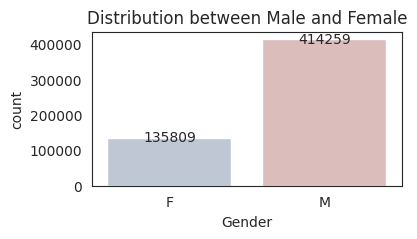

In [185]:
plt.figure(figsize = (4,2))
ax = sns.countplot(data = df, x = "Gender", palette = "vlag")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
plt.title("Distribution between Male and Female")
plt.show()

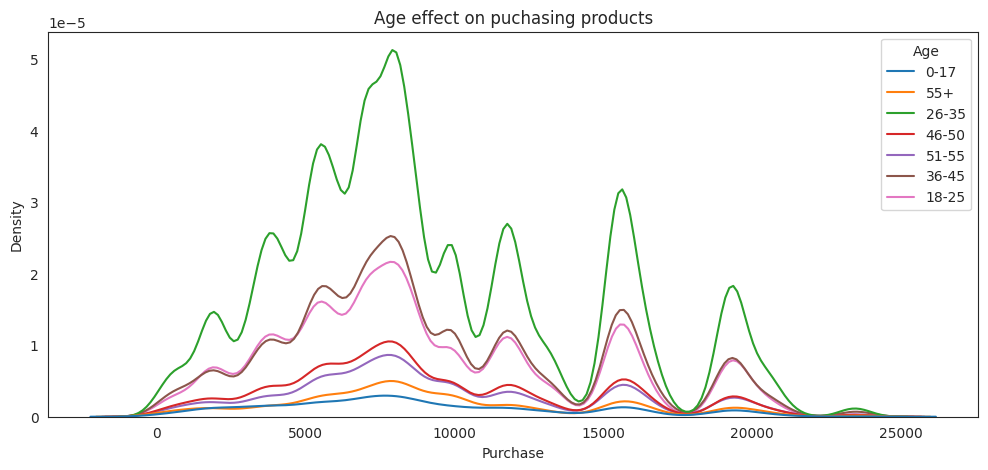

In [186]:
plt.figure(figsize = (12,5))
sns.kdeplot(data = df, x = "Purchase", hue = "Age")
plt.title("Age effect on puchasing products")
plt.show()

In [187]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
